# 1. 라이브러리 선언

### 일반 CPU 활용 방법

In [89]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

### nVidia CUDA 활용 방법

In [6]:
import tensorflow as tf
from tensorflow.python.client import device_lib
# 장치 목록 확인

print(device_lib.list_local_devices())

import os
os.environ["CUDA_VISIBLE_DEVICES"]='1'

# cuda gpu 적용
from tensorflow import keras
# mnist 데이터셋
from tensorflow.keras.datasets import mnist

import numpy as np
import pandas as pd

### Intel GPU 활용 방법 (PLAID ML)

In [13]:
import os

# intel gpu 적용
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras
# mnist 데이터셋
from keras.datasets import mnist

# 2. 데이터 불러오기 및 컬럼 생성

In [4]:
import pandas as pd
import numpy as np

# 데이터 불러오기 및 정렬
url = '../exampleCode/dataset/feature_regression_example.csv'
featuresData = pd.read_csv(url)
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [5]:
sortKey = ["REGIONID","PRODUCTGROUP","PRODUCT","ITEM","YEARWEEK"]
featuresData = featuresData.sort_values(sortKey)
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [24]:
# 숫자형 컬럼 생성
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

featuresData["LE_HOLIDAY"] = le.fit_transform(featuresData.HOLIDAY)
featuresData["LE_PROMOTION"] = le.fit_transform(featuresData.PROMOTION)
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_HOLIDAY,LE_PROMOTION
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,0,1


# 3. 데이터 분리

In [26]:
# 정답지 컬럼 정의
label = ["QTY"]

In [49]:
# 숫자형 특성컬럼 추출 (숫자 컬럼 중에서 라벨 컬럼만 제거하여 리스트로 만드는 작업)
features = list(set(featuresData.select_dtypes(np.number).columns)-set(label))
# np.number를 이용해 정수, 실수를 포함한 모든 숫자 컬럼을 추출해 SET 자료로 만든다.
# SET으로 만드는 이유는? Dataframe이라 pop이나 remove, del 연산이 되지 않는다.
# List로 만들면 '+' 연산은 되지만 '-' 연산은 되지 않는다. 그래서 SET으로 만들어 '-'연산을 한 다음 List로 만든다.
features

['LE_PROMOTION',
 'WEEK',
 'YEAR',
 'LE_HOLIDAY',
 'YEARWEEK',
 'HCLUS',
 'PRO_PERCENT']

In [69]:
# 데이터 분리 (8:2)
stdIndex = int(len(featuresData)*0.8)
stdYearweek = featuresData.loc[stdIndex,"YEARWEEK"]

In [70]:
# 문제지 시험지 분리 (8:2)
trainingData_features = featuresData[featuresData.YEARWEEK < stdYearweek][features]
trainingData_label = featuresData[featuresData.YEARWEEK < stdYearweek][label]
testData_features = featuresData[featuresData.YEARWEEK >= stdYearweek][features]
testData_label = featuresData[featuresData.YEARWEEK >= stdYearweek][label]
testData_all = featuresData[featuresData.YEARWEEK >= stdYearweek]

# 4. 특성 컬럼 선택

In [71]:
featuresData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
LE_HOLIDAY        int64
LE_PROMOTION      int64
dtype: object

In [81]:
corrdf = featuresData.corr()
corrdf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLIDAY,LE_PROMOTION
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
LE_HOLIDAY,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
LE_PROMOTION,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [87]:
# 상관관계가 0.5 < 상관관계 < 1 인 rows만 뽑아낸다.
corrStd = 0.5
targetIndex = corrdf.loc[(abs(corrdf.QTY) > corrStd) & (abs(corrdf.QTY) != 1),]
targetIndex

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_HOLIDAY,LE_PROMOTION
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
LE_HOLIDAY,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
LE_PROMOTION,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [95]:
features = list(targetIndex.index)
features

['HCLUS', 'PRO_PERCENT', 'LE_HOLIDAY', 'LE_PROMOTION']

# 5. 딥러닝

## 5.1 Regression

### 1 ) Sequential 방식 (뉴런 모델) -> Dense : Fully Connected Layer

In [96]:
# 모델 선언
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

In [100]:
# 모델의 아웃풋 갯수 정의하기 (최초 모델에는 인풋도 넣어줘야한다.)
# input_shape=(숫자,)로 ,을 꼭 찍어준다. cf. https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
model.add(Dense(8, activation='relu', input_shape=(len(features),)))   # 여기서 인풋은 4개(features), 아웃풋은 8개 -> 8 x 4 = 32가지 경우의 수
model.add(Dense(8, activation='relu'))   # 여기서 아웃풋은 8개 -> 32 x 8 = 256가지 경우의 수
model.add(Dense(1))   # 아웃풋 1개 -> 해당 모델을 학습시키면 4>8>8>1 의 과정을 거치며 총 256가지 경우의 수가 생겨난다.

# 0703

In [1]:
import pandas as pd
import numpy as np
import mnist
from tensorflow import keras

In [2]:
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [3]:
# 데이터 불러오기
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape) # (60000, 28, 28)
print(train_labels.shape) # (60000,)
print(test_images.shape) # (10000, 28, 28)
print(test_labels.shape) # (10000,)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
# 이미지 확인하기
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
imgNumber = 10

In [33]:
test = train_images[imgNumber]

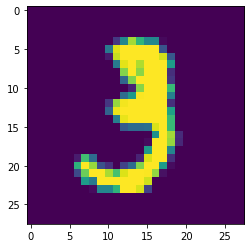

In [34]:
plt.imshow(test)

In [35]:
# 정답지 확인
train_labels[imgNumber]

3

In [36]:
# 이미지 정규화
train_images = (train_images / 255)
test_images = (test_images / 255)

In [ ]:
# 이미지 형태 변경 (향후 CNN 시 차원 DEPTH 추가 필요) * 현재는 필요없음!
train_images = train_images.reshape((len(train_images),28,28))
test_images = test_images.reshape((len(test_images),28,28))

print(train_images.shape) # (60000, 784)
print(test_images.shape) # (10000, 784)

# 데이터를 one-hot encoding 형태로 변경

In [37]:
from tensorflow.keras.utils import to_categorical

In [38]:
# Change the labels from integer to categorical data
# 향수 softmax activation 활용하기 위함. num_classes = 10
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [59]:
# Display the change for category label using one-hot encoding
print('Original label of imgNumber[{}] : '.format(imgNumber), train_labels[imgNumber])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[imgNumber])

Original label of imgNumber[10] :  3
After conversion to categorical ( one-hot ) :  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [60]:
# reverse 시킬 수도 있다
np.argmax(train_labels_one_hot[imgNumber])

3

In [64]:
# 모델 생성 (레이어(Sequential)방식 : 층층이 하나씩 쌓는 방식)

## 라이브러리 선언
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

## 입출력 형태 정의 
input_shape = train_images[0].shape
nclasses = len(np.unique(train_labels)) 

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(units=8, activation='relu', input_shape=input_shape))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=nclasses,activation='softmax') )

In [67]:
# 모델 생성 (Category)

## 라이브러리 선언
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

## 입출력 형태 정의
input_shape = train_images[0].shape
nclasses = len(np.unique(train_labels))

model = Sequential()
#input Layer model.add(Flatten(input_shape=input_shape))
#Hidden Layer-1
model.add(Dense(units=8, activation='relu'))
#Hidden Layer-2
model.add(Dense(units=8, activation='relu'))
#Output layer model.add(Dense(units=nclasses,activation='softmax')) model.summary()

model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=nclasses,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_12 (Dense)             (None, 10)                90        
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________


In [68]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [69]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [70]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [71]:
import os
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping
datetime.now().strftime("%Y%m%d_%H%M%S")
logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir
callbacks = [
    TensorBoard( log_dir = logdir),
    EarlyStopping(monitor="val_loss", patience=10),
    ModelCheckpoint(filepath="model_mnist_weights.h5",
                    monitor='val_accuracy',
                    verbose=1,
                    save_best_only=True,
                    mode='max')
]

In [72]:
history = model.fit(train_images,
                    train_labels_one_hot,
                    epochs=10,
                    batch_size=32,
                    callbacks=callbacks,
                    validation_split=0.2)

Epoch 1/10
1441/1500 [===========================>..] - ETA: 0s - loss: 2.3015 - accuracy: 0.1132
Epoch 00001: val_accuracy improved from -inf to 0.10600, saving model to model_mnist_weights.h5
1500/1500 [==============================] - 1s 906us/step - loss: 2.3015 - accuracy: 0.1131 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 2/10
1429/1500 [===========================>..] - ETA: 0s - loss: 2.3011 - accuracy: 0.1142
Epoch 00002: val_accuracy did not improve from 0.10600
1500/1500 [==============================] - 1s 859us/step - loss: 2.3012 - accuracy: 0.1140 - val_loss: 2.3021 - val_accuracy: 0.1060
Epoch 3/10
1445/1500 [===========================>..] - ETA: 0s - loss: 2.3011 - accuracy: 0.1147
Epoch 00003: val_accuracy did not improve from 0.10600
1500/1500 [==============================] - 1s 815us/step - loss: 2.3011 - accuracy: 0.1140 - val_loss: 2.3019 - val_accuracy: 0.1060
Epoch 4/10
1464/1500 [============================>.] - ETA: 0s - loss: 2.3011 - accuracy: 0.11

In [73]:
model.evaluate(test_images, test_labels_one_hot)

313/313 [==============================] - 0s 534us/step - loss: 2.3011 - accuracy: 0.1135


[2.3010830879211426, 0.11349999904632568]